In [1]:
%load_ext autoreload
%autoreload 2

%load_ext autotime

%cd ..

/Users/rubenbroekx/Documents/Projects/edbscan
time: 1.52 ms (started: 2021-12-13 14:49:50 +01:00)


# Comparison - DBSCAN

This notebook compares three variants of DBSCAN:
- The **DBSCAN** algorithm itself, as implemented by [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
- The **HDBSCAN** algorithm that takes a hierarchical approach to the cluster formation, as implemented by [scikit-learn contribution](https://hdbscan.readthedocs.io/en/latest/index.html)
- The **EDBSCAN** algorithm that takes a semi-supervised approach to the cluster formation, as implemented by [this repository](https://github.com/RubenPants/EDBSCAN)

In [2]:
# Specify the color scheme
COLORS = {
    None: 'tab:blue',
    -1: 'tab:blue',
    0: 'tab:orange',
    1: 'tab:green',
    2: 'tab:red',
    3: 'tab:purple',
    4: 'tab:brown',
    5: 'tab:pink',
    6: 'tab:gray',
    7: 'tab:olive',
    8: 'tab:cyan',
}

time: 589 µs (started: 2021-12-13 14:49:51 +01:00)


In [3]:
!pip install hdbscan
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path
from sklearn.cluster import DBSCAN
from hdbscan import HDBSCAN
from edbscan import EDBSCAN

time: 2.52 s (started: 2021-12-13 14:49:51 +01:00)


## Input data

The image below shows the data, with each of the already annotated data-points. The light-blue data points are unlabeled.

In [4]:
# Load in the data
with open(Path.cwd() / 'examples/data.npy', 'rb') as f:
    data = np.load(f,allow_pickle=True)

with open(Path.cwd() / 'examples/y.npy', 'rb') as f:
    y = np.load(f,allow_pickle=True)

time: 2.57 ms (started: 2021-12-13 14:49:54 +01:00)


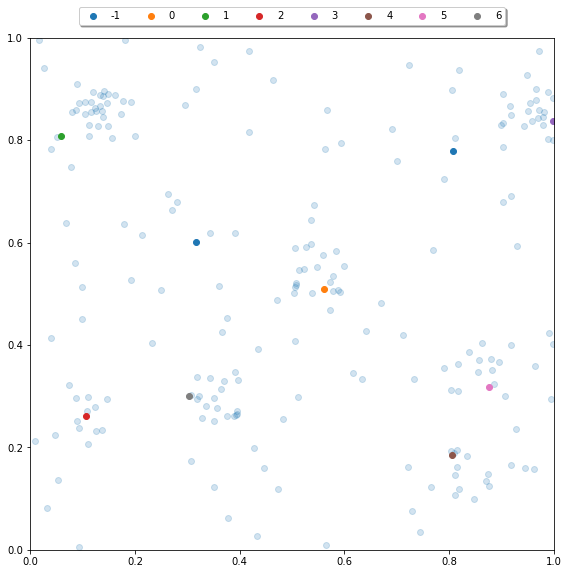

time: 473 ms (started: 2021-12-13 14:49:55 +01:00)


In [5]:
# Visualise the raw data (including the manually put labels)
plt.figure(figsize=(8,8))
for label in [None,] + list(range(-1,7)):
    plt.scatter(
        data[y == label,0],
        data[y == label,1],
        label=label,
        alpha=.2 if label == None else 1,
        color=COLORS[label],
    )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=8, fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('examples/images/default_labels.png', dpi=200, facecolor='white', transparent=False)
plt.show()

## DBSCAN

The result shows the clustered result after running the [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) algorithm. The light-blue data points are considered noise. Some observations on the result:
* Green (1) combined two clusters that should be separated
* Purple (3) combined two clusters that should be separated
* Brown (4) identified noise as a cluster

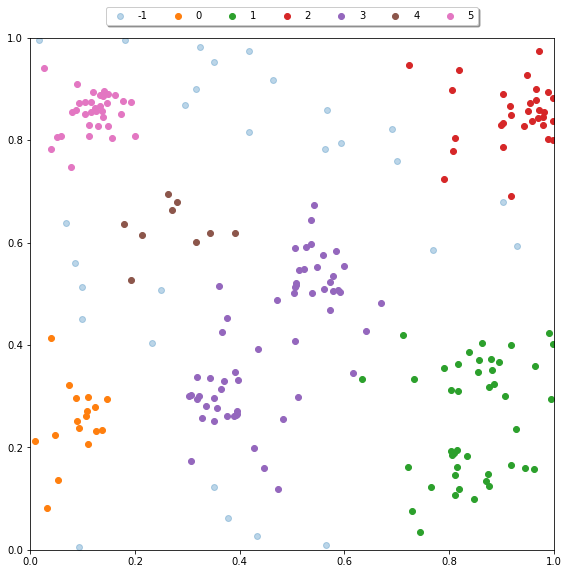

time: 416 ms (started: 2021-12-13 14:49:59 +01:00)


In [6]:
# DBSCAN
dbscan = DBSCAN(eps=.1,min_samples=5)
dbscan.fit(X=data,y=y)
labels = dbscan.labels_

# Visualise the result
plt.figure(figsize=(8,8))
for cluster in sorted(set(labels)):
    plt.scatter(
        data[labels == cluster,0], 
        data[labels == cluster,1], 
        label=cluster,
        alpha=0.3 if cluster == -1 else 1,
        color=COLORS[cluster],
    )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=len(set(labels)), fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('examples/images/default_dbscan.png', dpi=200, facecolor='white', transparent=False)
plt.show()

## HDBSCAN

The result shows the clustered result after running the [HDBSCAN](https://hdbscan.readthedocs.io/en/latest/index.html) algorithm. The light-blue data points are considered noise. Some observations on the result:
* Green (1) and Pink (5) are now successfully separated
* Grey (6) and Yellow (7) are now successfully separated
* Purple (3) identified noise as a cluster

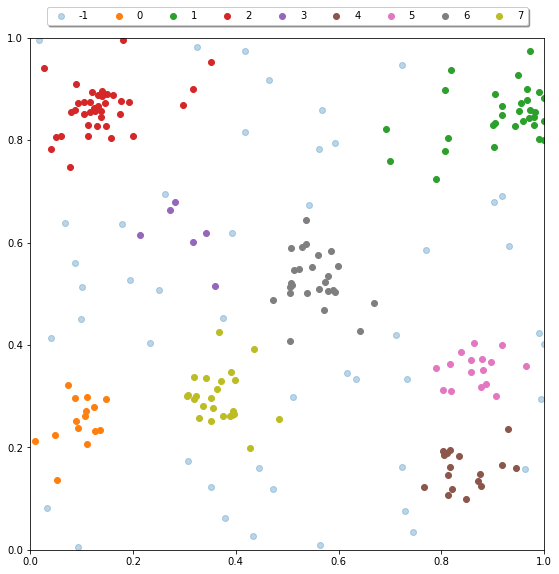

time: 460 ms (started: 2021-12-13 14:50:01 +01:00)


In [7]:
# HDBSCAN
hdbscan = HDBSCAN(min_samples=5)
hdbscan.fit(X=data, y=y)
labels = hdbscan.labels_

# Visualise the result
plt.figure(figsize=(8,8))
for cluster in sorted(set(labels)):
    plt.scatter(
        data[labels == cluster,0], 
        data[labels == cluster,1], 
        label=cluster,
        alpha=0.3 if cluster == -1 else 1,
        color=COLORS[cluster],
    )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=len(set(labels)), fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('examples/images/default_hdbscan.png', dpi=200, facecolor='white', transparent=False)
plt.show()

## EDBSCAN

The result shows the clustered result after running the [EDBSCAN](https://github.com/RubenPants/EDBSCAN) algorithm. The light-blue data points are considered noise. Some observations on the result:
* Orange (0) and Grey (6) are now successfully separated
* Brown (4) and Pink (5) are now successfully separated
* The noise that was previously detected as a cluster is now successfully identified as noise

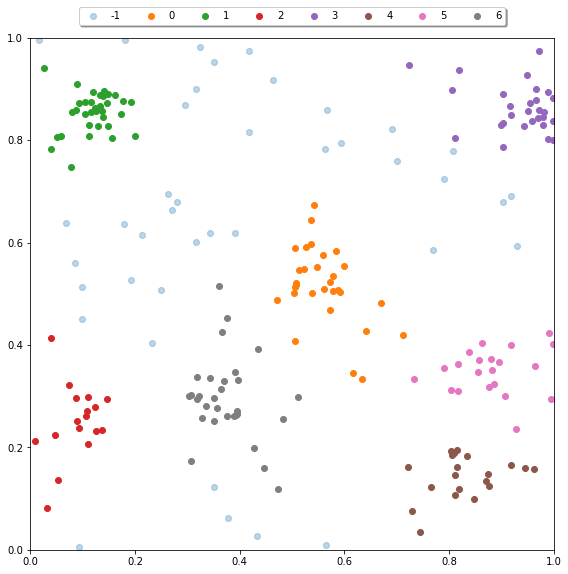

time: 504 ms (started: 2021-12-13 14:56:56 +01:00)


In [27]:
# EDBSCAN
edbscan = EDBSCAN(eps=.1,min_samples=5)
edbscan.fit(X=data,y=y)
labels = edbscan.get_labels()

# Visualise the result
plt.figure(figsize=(8,8))
for cluster in sorted(set(labels)):
    plt.scatter(
        data[labels == cluster,0], 
        data[labels == cluster,1], 
        label=cluster,
        alpha=0.3 if cluster == -1 else 1,
        color=COLORS[cluster],
    )
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.07),
          ncol=len(set(labels)), fancybox=True, shadow=True)
plt.tight_layout()
plt.savefig('examples/images/default_edbscan.png', dpi=200, facecolor='white', transparent=False)
plt.show()

## Timing

This section performs a time-comparison between the three aforementioned algorithms. As shown, the simpler DBSCAN algorithm is unsurprisingly the fastest, but luckily our implemented EDBSCAN algorithm is still slightly faster than HDBSCAN.

In [9]:
from time import time
from sklearn.cluster import dbscan
from hdbscan import hdbscan
from edbscan import edbscan

time: 582 µs (started: 2021-12-13 14:15:32 +01:00)


In [10]:
N = 1000

# DBSCAN
start_dbscan = time()
for _ in range(N):
    _ = dbscan(
        eps=.1,
        min_samples=5,
        X=data,
    )
stop_dbscan = time()

# HDBSCAN
start_hdbscan = time()
for _ in range(N):
    _ = hdbscan(
        min_samples=5,
        X=data,
    )
stop_hdbscan = time()

# EDBSCAN
start_edbscan = time()
for _ in range(N):
    _ = edbscan(
        eps=.1,
        min_samples=5,
        X=data,
        y=y,
    )
stop_edbscan = time()

print(f"Time overview:")
print(f" -  DBSCAN: {1000*(stop_dbscan-start_dbscan)/N:.2f} miliseconds per iteration")
print(f" - HDBSCAN: {1000*(stop_hdbscan-start_hdbscan)/N:.2f} miliseconds per iteration")
print(f" - EDBSCAN: {1000*(stop_edbscan-start_edbscan)/N:.2f} miliseconds per iteration")

Time overview:
 -  DBSCAN: 0.93 miliseconds per iteration
 - HDBSCAN: 2.93 miliseconds per iteration
 - EDBSCAN: 2.30 miliseconds per iteration
time: 6.17 s (started: 2021-12-13 14:15:32 +01:00)
